# Demo - Image Captioning

In [1]:
# Code Formatting Extension
%load_ext nb_black

<IPython.core.display.Javascript object>

# IMPORTS

In [1]:
import numpy as np
from pickle import load
from tensorflow.keras.applications.resnet_v2 import preprocess_input
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.sequence import pad_sequences
from IPython.display import display, Image

# Utils

In [3]:
import tensorflow as tf
print(tf.__version__)

2.6.0-rc1


<IPython.core.display.Javascript object>

In [2]:
# Path to various directories
project_root_path = "../"
dataset_root_path = project_root_path + "Dataset/"
models_root_path = project_root_path + "Models/"
variables_root_path = project_root_path + "Variables/"

In [3]:
# Function to load data from .pkl file at filepath
def loadData(filepath):
    with open(filepath, "rb") as encoded_pickle:
        return load(encoded_pickle)

In [4]:
# Loading Variables
img_cpt_dict = loadData(variables_root_path + "img_cpt_dict.pickle")
train_dataset = loadData(variables_root_path + "train_dataset.pickle")
max_caption_length = loadData(variables_root_path + "max_caption_length.pickle")
dev_dataset = loadData(variables_root_path + "dev_dataset.pickle")
test_dataset = loadData(variables_root_path + "test_dataset.pickle")
vocab = loadData(variables_root_path + "vocab.pickle")
most_probable_vocabulary = loadData(variables_root_path + "most_probable_vocabulary.pickle")
vocabulary_size = loadData(variables_root_path + "vocabulary_size.pickle")

resnet_model = load_model(models_root_path + "resnet_model")
 
encoded_train_images = loadData(variables_root_path + "encoded_train_images_resnet.pickle")
encoded_dev_images = loadData(variables_root_path + "encoded_dev_images_resnet.pickle")
encoded_test_images = loadData(variables_root_path + "encoded_test_images_resnet.pickle")

index_to_word = loadData(variables_root_path + "index_to_word.pickle")
word_to_index = loadData(variables_root_path + "word_to_index.pickle")
embeddings_matrix = loadData(variables_root_path + "embeddings_matrix.pickle")
embedding_dim = loadData(variables_root_path + "embedding_dim.pickle")

loaded_language_model = load_model(models_root_path + "language_model_2")

print(loaded_language_model.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 34)]         0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 2048)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 34, 200)      352600      input_2[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 2048)         0           input_1[0][0]                    
______________________________________________________________________________________________

In [5]:
def predict(feature_vec):
    partial_caption = "startseq"
    for i in range(max_caption_length):
        # integer encode input sequence
        seq = [word_to_index[word] for word in partial_caption.split() if word in word_to_index]
        # pad input
        seq = pad_sequences([seq], maxlen = max_caption_length)
        # predict next word
        model_softMax_output = loaded_language_model.predict([feature_vec, seq], verbose = 0)
        # convert probability to integer
        word_index = np.argmax(model_softMax_output)
        # map integer to word
        word = index_to_word[word_index]
        partial_caption += " " + word
        if (word == "endseq"):
            break
    final_caption = partial_caption.split()[1:-1]
    final_caption = " ".join(final_caption)
    return final_caption

ResNet Model
236730743_0d4fd8de5a


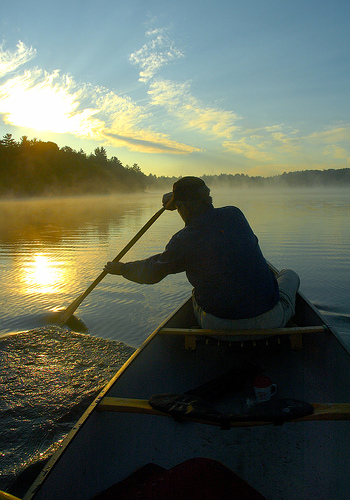

Prediction: man paddles canoe on the water

Actual Description: man is paddling boat during sunset
Actual Description: man paddles his canoe on the lake
Actual Description: man rows his boat while the sun sets
Actual Description: person in hat reaches with paddle while sitting in canoe on lake
Actual Description: with the sun reflecting off the water man is sitting in boat and rowing


<IPython.core.display.Javascript object>

In [26]:
# OBSERVATION OF PERFORMANCE ON RANDOM IMAGES FROM DEV DATASET
key = list(dev_dataset.keys())[np.random.randint(0, 1000)]
print("ResNet Model")
print(key)
feature_vec = encoded_dev_images[key].reshape((1, 2048))
display(Image(filename = dataset_root_path + "Flicker8k_Dataset/" + key + ".jpg"))
print("Prediction: {}".format(predict(feature_vec)))
print()
for caption in dev_dataset[key]:
    caption = " ".join(caption.split()[1:-1])
    print("Actual Description: {}".format(caption))

ResNet Model
544576742_283b65fa0d


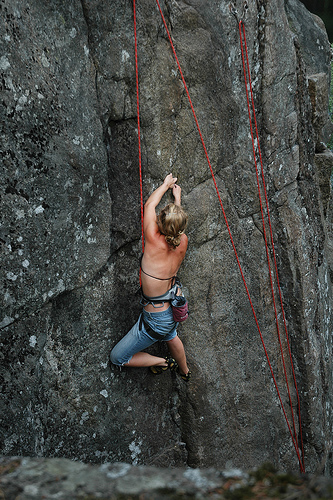

Prediction: man in red shirt is rock climbing

Actual Description: rock climber repels off rocky wall
Actual Description: woman climbing rock cliff
Actual Description: woman in jeans rock climbing
Actual Description: the woman is holding onto huge rock and has red string around her
Actual Description: woman goes rock climbing

ResNet Model
3485425825_c2f3446e73


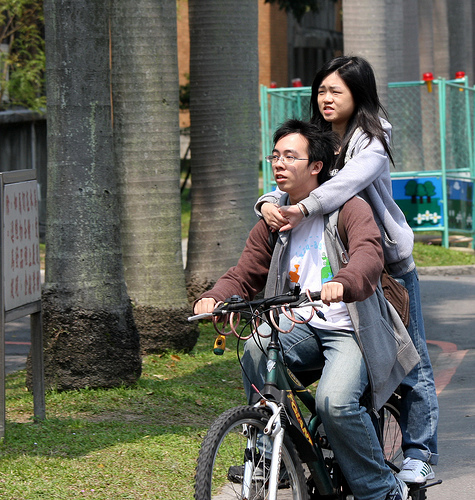

Prediction: man in blue shirt and beard pants is riding bike

Actual Description: male and female on one seat bike ride along tree lined road
Actual Description: man rides bicycle while young girl holds onto the back of him
Actual Description: young girl is standing on the back of man bicycle while the man peddles forward
Actual Description: man on bike with female standing on rear of back with arms around his neck
Actual Description: one kid is towing another on his bike

ResNet Model
3040033126_9f4b88261b


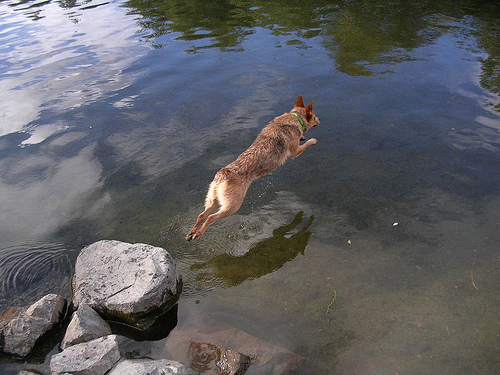

Prediction: the dog is walking through the water

Actual Description: brown dog jumping off rock into lake
Actual Description: brown dog leaps into water from rock
Actual Description: dog is taking dive into body of water
Actual Description: dog leaps over the water from rock
Actual Description: the dog is leaping into the water

ResNet Model
2933637854_984614e18b


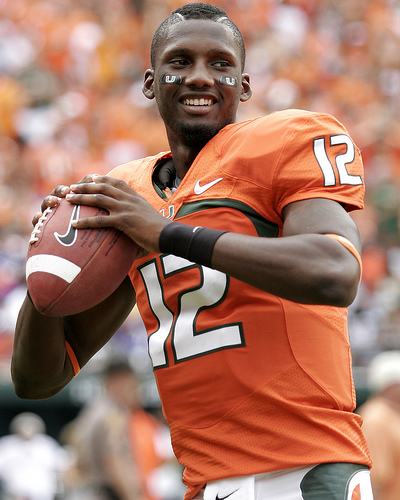

Prediction: man in white uniform and red shorts is walking in the street with onlookers behind him

Actual Description: football player wearing an orange jersey holding football
Actual Description: football player wearing an orange uniform smiling and holding the football
Actual Description: man in an orange jersey with the letter on it plays football
Actual Description: university of miami player holds football
Actual Description: number in orange gets ready to throw the football

ResNet Model
3619416477_9d18580a14


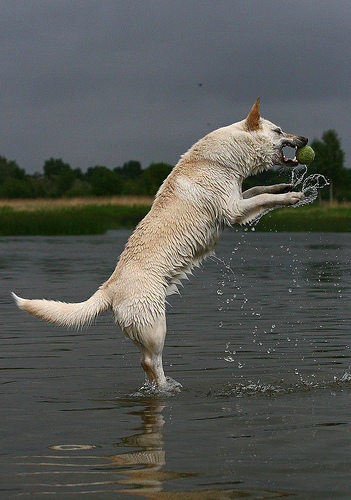

Prediction: white dog is running through shallow water

Actual Description: white dog catches green ball while standing in shallow water
Actual Description: white dog is jumping up out of the water to catch ball
Actual Description: white dog jumps in the water to catch tennis ball
Actual Description: white dog jumps out of the water to catch ball
Actual Description: white dog jumps out of the water to catch tennis ball

ResNet Model
2646116932_232573f030


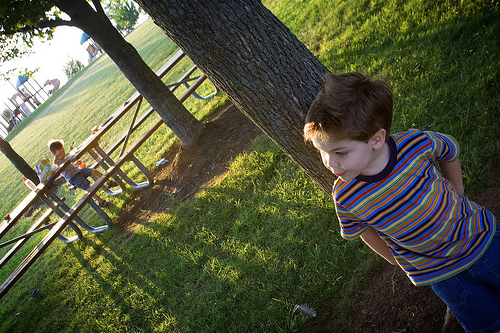

Prediction: little girl in pink dress runs down path

Actual Description: boy hiding behind tree
Actual Description: boy in striped tshirt is standing by tree in front of the picnic tables
Actual Description: little boy in striped shirt is standing behind tree
Actual Description: young boy in striped shirt is leaning against tree while another child sits at picnic table
Actual Description: two boys in park one standing near tree and one sitting at picnic table with the playground behind them

ResNet Model
2706766641_a9df81969d


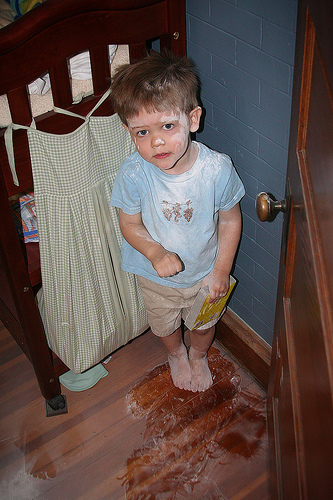

Prediction: baby in red shirt is sitting on wooden floor

Actual Description: child and floor covered in white powder
Actual Description: little boy is in the corner covered in white powder that is all over him and the floor
Actual Description: little boy with mess all over his face and feet stands next to door
Actual Description: young boy is caught making mess of his room
Actual Description: young child covered with white powder

ResNet Model
2891617125_f939f604c7


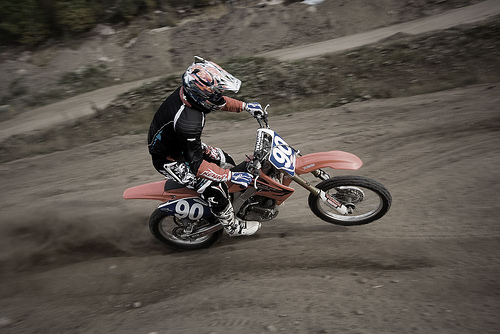

Prediction: man on motorcycle rides on dirt road

Actual Description: man on motorized bike rides across dirt road
Actual Description: man rides pinkish motorbike on hill
Actual Description: person on dirt bike is riding up sandy hill
Actual Description: person riding dirt bike
Actual Description: man riding dirt bike on dirt track

ResNet Model
3052196390_c59dd24ca8


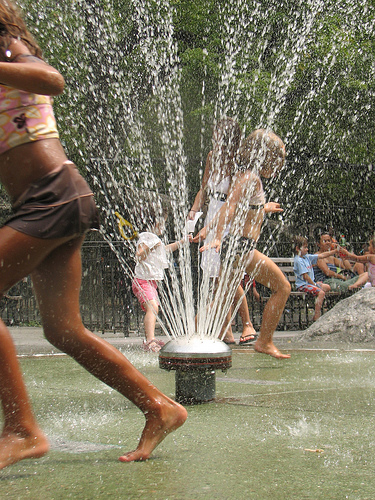

Prediction: girl in swimsuit is pointing at the water fountain

Actual Description: group of children playing in sprinkler
Actual Description: group of children playing in water fountain
Actual Description: children play in water spray
Actual Description: little kids enjoy sprinklers by running through them outdoors
Actual Description: several girls in swimsuits are playing in sprinkler fountain

ResNet Model
3439382048_d2e23b2b4c


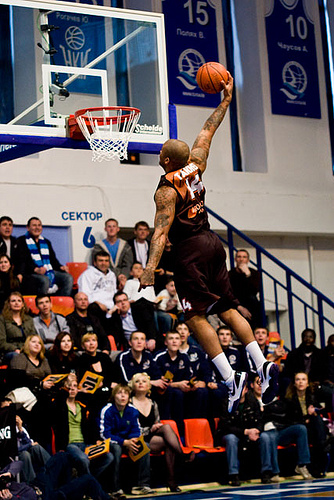

Prediction: two men are playing basketball

Actual Description: bald man is attempting to slam dunk basketball in game while people in the stands watch
Actual Description: basketball player is jumping and about to dunk ball in front of crowd
Actual Description: man reaches toward dunking basketball while an audience watches
Actual Description: tattooed man dunks basketball
Actual Description: the tattooed basketball player is about to dunk the ball



<IPython.core.display.Javascript object>

In [27]:
# OBSERVATION OF PERFORMANCE ON RANDOM IMAGES FROM TEST DATASET
keys = np.random.choice(list(test_dataset.keys()), 10)
for key in keys:
    print("ResNet Model")
    print(key)

    feature_vec = encoded_test_images[key].reshape((1, 2048))

    display(Image(filename = dataset_root_path + "Flicker8k_Dataset/" + key + ".jpg"))
    print("Prediction: {}".format(predict(feature_vec)))
    print()

    for caption in test_dataset[key]:
        caption = " ".join(caption.split()[1:-1])
        print("Actual Description: {}".format(caption))
    print()


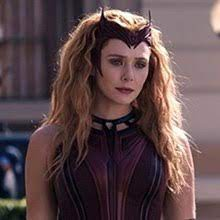

Prediction: woman with curly hair wearing red shirt and hoop



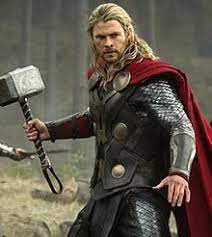

Prediction: man in black shirt and cap is holding up cup



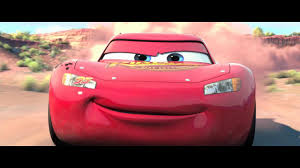

Prediction: two girls are sitting in red car



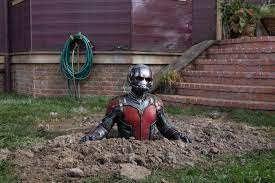

Prediction: man in red shirt and jeans is sitting on bench with camping



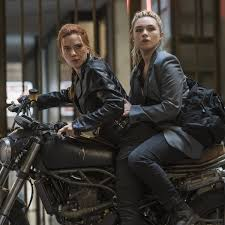

Prediction: man in black jacket and hat is sitting on bench



<IPython.core.display.Javascript object>

In [11]:
# OBSERVATION OF PERFORMANCE ON RANDOM IMAGES INPUT FROM LOCAL MACHINE
def image_to_feature_vec(image_path):
    img = image.load_img(image_path, target_size = (224, 224))
    # convert the image pixels to a numpy array
    x = image.img_to_array(img)
    # prepare the image for the ResNet model
    x = np.expand_dims(x, axis = 0)
    x = preprocess_input(x)
    # get features
    feature_vec = resnet_model.predict(x)
    # reshape data for the model
    feature_vec = np.reshape(feature_vec, feature_vec.shape[1])
    return feature_vec.reshape((1, 2048))

for i in range(1, 6):
    image_path = project_root_path + "TestingImages/" + str(i) + ".jpg"

    feature_vec = image_to_feature_vec(image_path)

    display(Image(filename = image_path))
    print("Prediction: {}".format(predict(feature_vec)))
    print()